**Install the packages**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import nashpy as nash

In [11]:
def random_probability_distribution(N):
    # Generate N random numbers
    random_values = np.random.rand(N)
    # Normalize the values so they sum to 1
    probabilities = random_values / np.sum(random_values)
    return probabilities

In [18]:
def strategies_overtime(game, init_strategies = None):
    strategies = init_strategies if init_strategies is not None else [random_probability_distribution(2), random_probability_distribution(2)]

    xs, ys = game.asymmetric_replicator_dynamics(
    x0=np.array(strategies[0]), y0=np.array(strategies[0]))

    return xs, ys

# **LESSON 3: REPLICATOR DYNAMICS FOR THE PRISONER'S DILEMMA**

# **Probability distribution of strategies over time for players**

In [8]:
# Create the game with the payoff matrix
A = np.array([[-1,-5],[0,-3]]) # A is the payoff matrix of Player 1 (the column player - Julian)
B = np.array([[-1,0],[-5,-3]]) # B is the payoff matrix of Player 2 (the row player - Thomas)
game = nash.Game(A,B)  # create a game with the input of the payoff matrices of two players.

# Print the payoff matrices of each player
print(game.payoff_matrices[0]) # for Player 1
print(game.payoff_matrices[1]) # for Player 2

# Set the initial probabilities of each player
# x0 = [x01, x02] and y0=[y01, y02]
x01 = 0.8       # the probability of Player 1 for action 1 (action C)
x02 = 1 - x01   # the probability of Player 1 for action 2 (action D)
y01 = 0.4       # the probability of Player 2 for action 1 (action C)
y02 = 1 - y01   # the probability of Player 2 for action 2 (action D)

# Find the replicator dynamics with initial probabilities x0 and y0
xs, ys = game.asymmetric_replicator_dynamics(
    x0=np.array([x01, x02]), y0=np.array([y01, y02]))

[[-1 -5]
 [ 0 -3]]
[[-1  0]
 [-5 -3]]


In [16]:
def plot_strategies_overtime(xs, ys):
    plt.figure(figsize=(5, 5))
    plt.plot(xs)
    plt.xlabel("Timepoints")
    plt.ylabel("Probability")
    plt.title("Probability distribution of strategies over time for Player 1")
    plt.legend(["$x_{1C}$", "$x_{1D}$"])

    plt.figure(figsize=(5, 5))
    plt.plot(ys)
    plt.xlabel("Timepoints")
    plt.ylabel("Probability")
    plt.title("Probability distribution of strategies over time for Player 2")
    plt.legend(["$x_{2C}$", "$x_{2D}$"])

In [ ]:
# Plot the performance of replicator_dynamics for each player
plt.figure(figsize=(5, 5))
plt.plot(xs)
plt.xlabel("Timepoints")
plt.ylabel("Probability")
plt.title("Probability distribution of strategies over time for Player 1")
plt.legend(["$x_{1C}$", "$x_{1D}$"])

plt.figure(figsize=(5, 5))
plt.plot(ys)
plt.xlabel("Timepoints")
plt.ylabel("Probability")
plt.title("Probability distribution of strategies over time for Player 2")
plt.legend(["$x_{2C}$", "$x_{2D}$"])


# **Plot replicator dynamics for Prisoner's dilemma**

# First method: use *the system of differential equations*

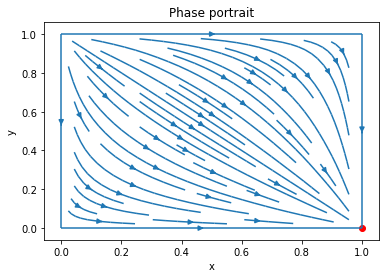

In [5]:
# Add the Nash equilibrium point(s) (NEs) of the game
# NEs = np.array([[..., ...]])
# first element corresponds to the probability of selection action 2 of Player 1
# second element corresponds to the probability of selection action 1 of Player 2
NEs = np.array([[1., 0.]])  # (D, D) X=x1D=1 and Y=x2C=0


# Create the mesh grid for the figure
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
X, Y = np.meshgrid(x, y)

# Write the system of differential equations
Xdot = X * (1 - X) * (2 - Y)  # differential equation of Xdot
Ydot = -Y * (1 - Y) * (1 + X) # differential equation of Ydot

# Plot the Phase portrait
fig, ax = plt.subplots()
plt.title("Phase portrait")
plt.ylabel("y")
plt.xlabel("x")

ax.streamplot(X, Y, Xdot, Ydot, density = 0.8) # draw streamlines of a vector flow of the system.
ax.scatter(*NEs.T, color="r") # draw the NEs
plt.show()

# Second method: use *nashpy* to find NEs and plot replicator dynamics

In [25]:
def plot_replicator(game):
    # Find the Nash Equilibrium with Support Enumeration
    equilibria = game.support_enumeration()
    # NEs = np.array([[eq[0][1], eq[1][0]]])
    # eq[0][1] = first element corresponds to the probability of selection action 2 (index = 1) of Player 1 (index = 0)
    # eq[1][0] = second element corresponds to the probability of selection action 1  (index = 0) of Player 2 (index = 1)
    NEs = np.array([[eq[0][1], eq[1][0]] for eq in equilibria])  # generator used once

    # Plot the titles
    fig, ax = plt.subplots()
    plt.title("Replicator dynamic of Prisoner’s Dilemma (NE = red point)")
    plt.xlabel("Probability of Player 1 choosing the action 2")
    plt.ylabel("Probability of Player 2 choosing the action 1")

    # Plot the boundary of X and Y axis
    x = np.linspace(0, 1)
    plt.plot(x, x * 0, color='k')
    plt.plot(x * 0, x, color='k')
    plt.plot(x, np.ones(len(x)), color='k')
    plt.plot(np.ones(len(x)), x, color='k')

    for x0 in list(np.linspace(0, 1, 10)):
        for y0 in list(np.linspace(0, 1, 10)):
            if x0 == 0 or x0 == 1 or y0 == 0 or y0 == 1:  # remove the vertices
                continue
            xs, ys = game.asymmetric_replicator_dynamics(x0=np.array([1-x0, x0]), y0=np.array([y0, 1-y0]))
            plt.plot(xs[:, 1], ys[:, 0])
            index_arrow = round(len(xs[:, 1])/ 1000)
            ax.annotate('',
                xytext=(xs[index_arrow, 1], ys[index_arrow, 0]),
                xy=(xs[index_arrow + 15, 1], ys[index_arrow + 15, 0]),
                arrowprops=dict(arrowstyle="->", color='k'),
                size=5
            )

    ax.scatter(*NEs.T, color='r', marker = 'o', alpha=1, edgecolors='k', zorder=2)  # unpacked version
    distance_x = 0.05
    distance_y = 0.05

    list_texts = [[0 - distance_x, 0 - distance_y, f"({A[1][0]},{B[1][0]})"],
                [1 + distance_x, 0 - distance_y, f"({A[1][1]},{B[1][1]})"],
                [0 - distance_x, 1 + distance_y, f"({A[0][0]},{B[0][0]})"],
                [1 + distance_x, 1 + distance_y, f"({A[0][1]},{B[0][1]})"]]
    for info_text in list_texts:
        ax.text(info_text[0], info_text[1], info_text[2], ha="center", va="center", size=10, color = 'b',
            bbox=dict(boxstyle="round,pad=0", facecolor='none', edgecolor='white'))  # fontweight='bold'
    ax.set_xlim([-0.12, 1.12])
    ax.set_ylim([-0.1, 1.1])
    plt.show()


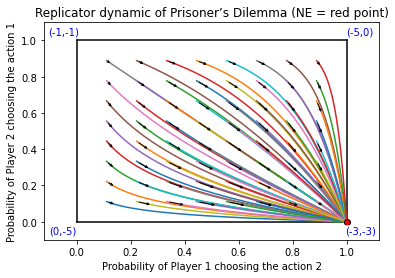

In [7]:
# Find the Nash Equilibrium with Support Enumeration
equilibria = game.support_enumeration()
# NEs = np.array([[eq[0][1], eq[1][0]]])
# eq[0][1] = first element corresponds to the probability of selection action 2 (index = 1) of Player 1 (index = 0)
# eq[1][0] = second element corresponds to the probability of selection action 1  (index = 0) of Player 2 (index = 1)
NEs = np.array([[eq[0][1], eq[1][0]] for eq in equilibria])  # generator used once

# Plot the titles
fig, ax = plt.subplots()
plt.title("Replicator dynamic of Prisoner’s Dilemma (NE = red point)")
plt.xlabel("Probability of Player 1 choosing the action 2")
plt.ylabel("Probability of Player 2 choosing the action 1")

# Plot the boundary of X and Y axis
x = np.linspace(0, 1)
plt.plot(x, x * 0, color='k')
plt.plot(x * 0, x, color='k')
plt.plot(x, np.ones(len(x)), color='k')
plt.plot(np.ones(len(x)), x, color='k')

for x0 in list(np.linspace(0, 1, 10)):
    for y0 in list(np.linspace(0, 1, 10)):
      if x0 == 0 or x0 == 1 or y0 == 0 or y0 == 1:  # remove the vertices
        continue
      xs, ys = game.asymmetric_replicator_dynamics(x0=np.array([1-x0, x0]), y0=np.array([y0, 1-y0]))
      plt.plot(xs[:, 1], ys[:, 0])
      index_arrow = round(len(xs[:, 1])/ 1000)
      ax.annotate('',
        xytext=(xs[index_arrow, 1], ys[index_arrow, 0]),
        xy=(xs[index_arrow + 15, 1], ys[index_arrow + 15, 0]),
        arrowprops=dict(arrowstyle="->", color='k'),
        size=5
    )

ax.scatter(*NEs.T, color='r', marker = 'o', alpha=1, edgecolors='k', zorder=2)  # unpacked version
distance_x = 0.05
distance_y = 0.05

list_texts = [[0 - distance_x, 0 - distance_y, f"({A[1][0]},{B[1][0]})"],
              [1 + distance_x, 0 - distance_y, f"({A[1][1]},{B[1][1]})"],
              [0 - distance_x, 1 + distance_y, f"({A[0][0]},{B[0][0]})"],
              [1 + distance_x, 1 + distance_y, f"({A[0][1]},{B[0][1]})"]]
for info_text in list_texts:
  ax.text(info_text[0], info_text[1], info_text[2], ha="center", va="center", size=10, color = 'b',
          bbox=dict(boxstyle="round,pad=0", facecolor='none', edgecolor='white'))  # fontweight='bold'
ax.set_xlim([-0.12, 1.12])
ax.set_ylim([-0.1, 1.1])
plt.show()


# **LESSON 3: REPLICATOR DYNAMICS FOR THE CONGESTION GAME**

# **Probability distribution of strategies over time for players**

In [20]:
A=[[3,0],[0,1]]
B=[[1,0],[0,3]]
game = nash.Game(A, B)
xs, ys = strategies_overtime(game)

# **Plot replicator dynamics**

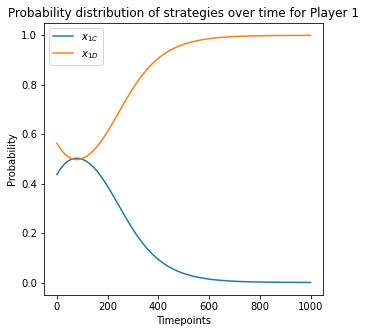

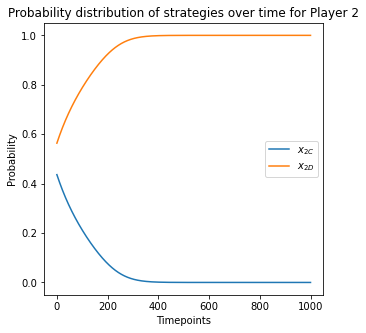

In [21]:
plot_strategies_overtime(xs, ys)

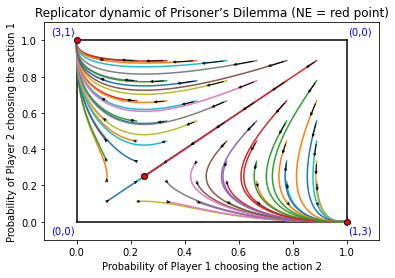

In [26]:
plot_replicator(game)

# **LESSON 3: REPLICATOR DYNAMICS FOR THE MATCHING PENNIES GAME**

# **Probability distribution of strategies over time for players**

# **Plot replicator dynamics**